In [1]:
import pandas as pd



In [2]:
csv_file = 'sales_data.csv'
excel_file = 'sales_data.xlsx'
json_file = 'sales data.json'

In [4]:
df_csv = pd.read_csv(csv_file)
df_excel = pd.read_excel(excel_file)
df_json = pd.read_json(json_file)

In [5]:
df_combined = pd.concat([df_csv, df_excel, df_json], ignore_index=True)


In [6]:
print(df_combined.head())
print(df_combined.info())
print(df_combined.describe())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [7]:
print(df_combined.isnull().sum())


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        5042
CITY                   0
STATE               2972
POSTALCODE           152
COUNTRY                0
TERRITORY           2148
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [8]:
df_cleaned = df_combined.drop_duplicates()

In [10]:
df_cleaned = df_combined.dropna(subset=['ORDERNUMBER'])
df_cleaned['SALES'] = df_cleaned['SALES'].fillna(df_cleaned['SALES'].mean())
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'], errors='coerce')


In [11]:
q = df_cleaned['SALES'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['SALES'] < q]

In [12]:
df_cleaned['YEAR'] = df_cleaned['ORDERDATE'].dt.year
df_cleaned['MONTH'] = df_cleaned['ORDERDATE'].dt.month


In [13]:
sales_by_year = df_cleaned.groupby('YEAR')['SALES'].sum().reset_index()


In [14]:
df_cleaned['SALES_NORMALIZED'] = (df_cleaned['SALES'] - df_cleaned['SALES'].min()) / (df_cleaned['SALES'].max() - df_cleaned['SALES'].min())


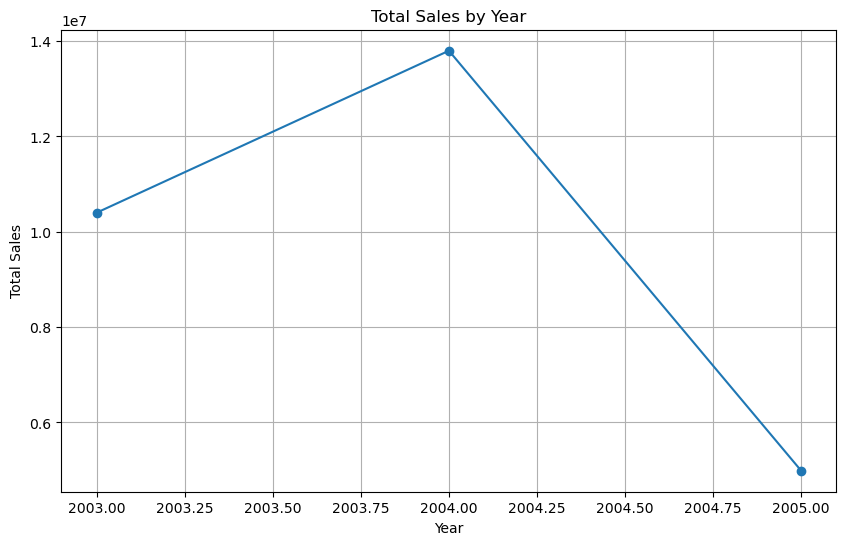

In [16]:
import matplotlib.pyplot as plt

# Ensure SALES column contains only numeric values
# Convert to numeric, forcing errors to NaN, then drop those rows
df_cleaned['SALES'] = pd.to_numeric(df_cleaned['SALES'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['SALES'])

# Group data by year and sum the sales
sales_by_year = df_cleaned.groupby('YEAR')['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['YEAR'], sales_by_year['SALES'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


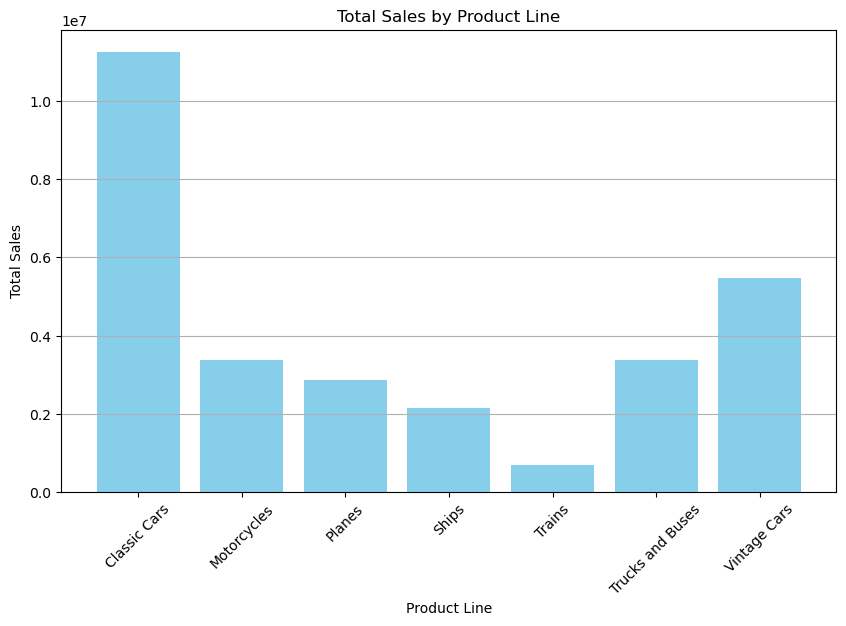

In [17]:
import matplotlib.pyplot as plt

# Group data by product line and sum the sales
sales_by_product_line = df_cleaned.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sales_by_product_line['PRODUCTLINE'], sales_by_product_line['SALES'], color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


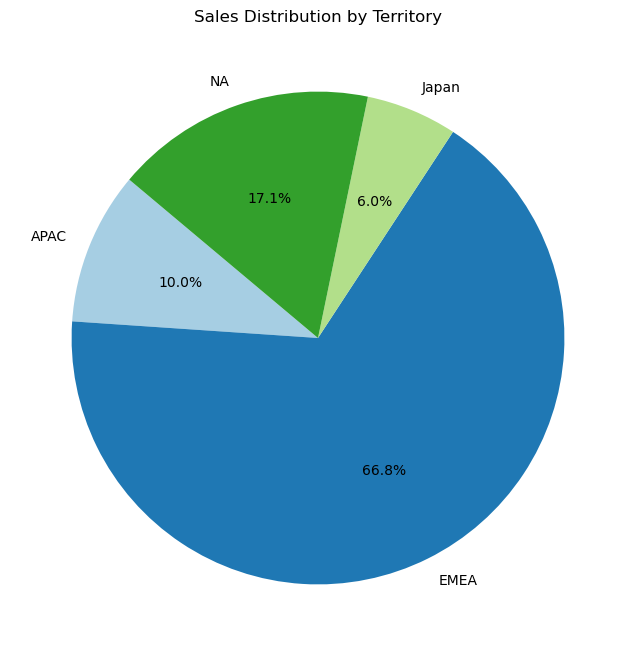

In [18]:
# Group data by territory and sum the sales
sales_by_territory = df_cleaned.groupby('TERRITORY')['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sales_by_territory['SALES'], labels=sales_by_territory['TERRITORY'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Territory')
plt.show()


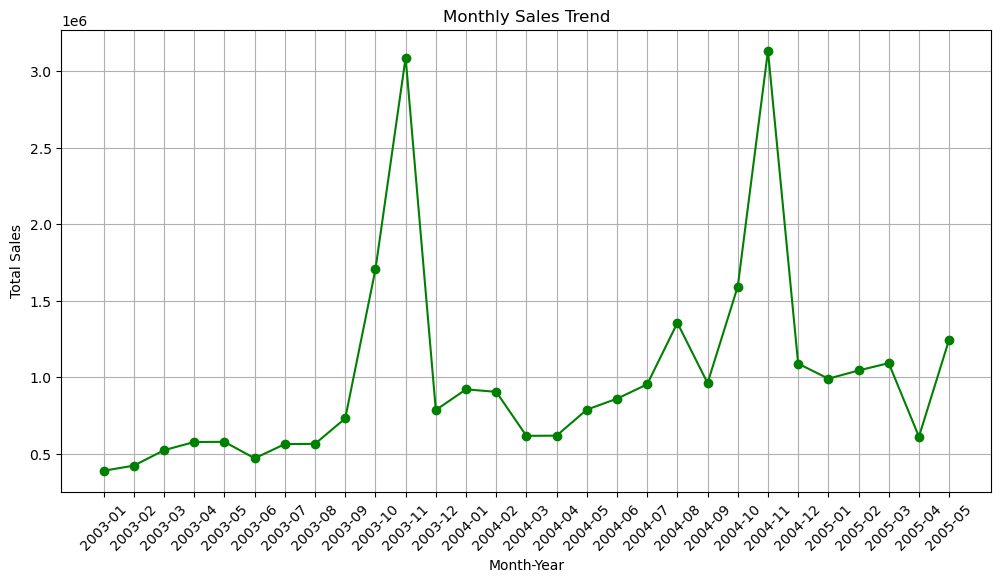

In [19]:
# Create a 'Month-Year' column for better grouping
df_cleaned['MONTH_YEAR'] = df_cleaned['ORDERDATE'].dt.to_period('M')

# Group data by month-year and sum the sales
sales_by_month = df_cleaned.groupby('MONTH_YEAR')['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['MONTH_YEAR'].astype(str), sales_by_month['SALES'], marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


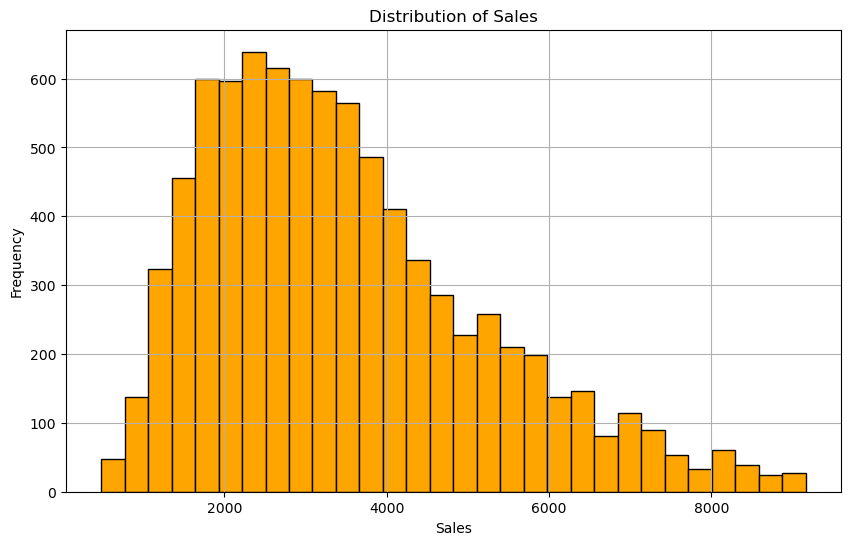

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['SALES'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [21]:
df_cleaned

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH,SALES_NORMALIZED,MONTH_YEAR
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,2003,2,0.275272,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2003,5,0.263161,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,7,0.392040,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,2003,8,0.376179,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,NaN,Brown,Julie,Medium,2003,10,0.544252,2003-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,28034,Spain,EMEA,Freyre,Diego,Small,2004,12,0.203068,2004-12
8465,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2005,1,0.402891,2005-01
8466,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,28034,Spain,EMEA,Freyre,Diego,Medium,2005,3,0.568715,2005-03
8467,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,31000,France,EMEA,Roulet,Annette,Small,2005,3,0.188291,2005-03
